In [107]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
# import folium
import json
# import pydeck as pdk
# import geopandas as gpd
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list_mac = fm.win32InstalledFonts()
print(len(font_list_mac))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
# print(fm.fontManager.ttflist)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)
set_matplotlib_formats('retina')

버전:  3.1.0
설치 위치:  c:\project\venv\dacon\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\dhkim\.matplotlib
캐시 위치:  C:\Users\dhkim\.matplotlib
설정 파일 위치:  c:\project\venv\dacon\lib\site-packages\matplotlib\mpl-data\matplotlibrc
367
372
367
Malgun Gothic


In [118]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from collections import Counter


In [560]:
# names = ['작성시간','작성자','위치','내용','좋아요수','해쉬태그']
# crawling_data = pd.read_csv('서교동.txt', sep="\t", names=names)
crawling_data = pd.read_csv('서교동_중복제거.txt', sep="\t", header=0)
crawling_data.tail(5)
print(crawling_data.shape)

(3395, 7)


In [561]:
crawling_data = crawling_data.drop_duplicates()
crawling_data.shape
# crawling_data.to_csv("서교동_중복제거.txt",sep="\t")

(3395, 7)

In [562]:
timedata = crawling_data['작성시간']
day_data = timedata.str.slice(stop=10)
hour = timedata.str.slice(start=11,stop=-11)
year = day_data.str.slice(stop=4)
month = day_data.str.slice(start=5,stop=7)
day = day_data.str.slice(start=8,stop=10)
post_crawl = crawling_data.copy()
post_crawl['year'] = year
post_crawl['month'] = month
post_crawl['day'] = day
post_crawl['hour'] = hour
post_crawl = post_crawl[['year','month','작성자','hour','위치','해쉬태그','좋아요수']]
# daydata = timedata

In [563]:
def process_hash_tag(df):
    df["해쉬태그"] = df["해쉬태그"].str.split("_") 
    results = []
    for row in df['해쉬태그']:
#         print(row)
        if row is np.nan:
            results.append(0)
        else:
            temp = []
            for x in row:
                try:
                    if len(x)>0 and x[0]=="#":
                        temp.append(x[1:])
                except SyntaxError:
                    temp.append(x)
            if temp == []:
                temp =0
            results.append(temp)
    df['해쉬태그'] = results


In [564]:
process_hash_tag(post_crawl)
post_crawl

,year,month,작성자,hour,위치,해쉬태그,좋아요수
0,2020,03,hchooo_,09,서교동,0,360
1,2020,02,pil2076,12,서교동,"[김동한, KIMDONGHAN, D, OUIentertainment]",285
2,2020,04,siiiido,07,서교동,"[조던풋내기, 조던신출내기, 새친구]","3,110"
3,2020,04,unum_by_un,07,서교동,0,465
4,2020,02,menyajoon,11,서교동,0,166
...,...,...,...,...,...,...,...
3390,sarr,we,마포구_서교동,,./싱싱한_딸기가_막_도착했어요:D/딸기우유랑_타르트_많이_만들어_놓을께용/././...,0,#사르르과자점_#사르르타르트_#딸기타르트_#365일생딸기사용_#사르르_#수제디저트_...
3391,up.s,_,마포구_서교동,,미쉐린_1스타_서교동_왕육성쉐프님의_중식당_진진!!/한주_노동주_1차로_고고고!!!...,0,#서교동맛집_#왕육성셰프_#진진_#노동주_#이제시작_#미쉐린가이드_#미쉐린1스타_#...
3392,syoi,i,마포구_서교동,,유산소_3시간_=_어제의_숙취_해결_완료_🍻🥂🍾🤸🏻‍♀️,0,NaN
3393,ynhk,ng,마포구_서교동,,#빠삐요뜨_#까르토치오_#이름이뭐든간에_#병어_#망원시장_#네마리만원/././#데일...,0,#빠삐요뜨_#까르토치오_#이름이뭐든간에_#병어_#망원시장_#네마리만원_#데일리_#일...


In [565]:
tag_post = post_crawl[post_crawl["해쉬태그"]!=0]
print(tag_post.shape)
tags = tag_post["해쉬태그"]

(1719, 7)


In [566]:
all_tags = np.concatenate(np.array(tags))
post_all_tags = []
for tag in all_tags:
    if ("인스타그램" in tag) or ("인스타" in tag) or ("서교동" in tag) or ("홍대" in tag) or (tag=="맞팔") or (tag=="소통") and not ("데이트" in tag):
        continue
    elif (tag=="선팔") or (tag=="좋아요") or (tag=="follow") or (tag=="daily") or (tag=="일상") or (tag=="선팔하면맞팔") or ("좋아요반사"==tag):
        continue
    elif ("연남" in tag) or ("합정" in tag) or("좋아요반사"==tag) or ("맛집" in tag)  or ("망원동" in tag):
        continue
    elif ("일상" in tag) or ("데일리" in tag):
        continue
    elif "스타그램" in tag:
#         print(tag)
        newtag = "".join(tag.split("스타그램"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif ("스타" in tag) and ("랍스타" not in tag) and ("파스타" not in tag) and ("스타일" not in tag):
#         print(tag)
        newtag = "".join(tag.split("스타"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    elif "그램" in tag:
#         print(tag)
        newtag = "".join(tag.split("그램"))
        if len(newtag)==1:
            newtag = tag
#         print(newtag)
    else:
        newtag = tag
    post_all_tags.append(newtag)
post_all_tags


['김동한',
 'KIMDONGHAN',
 'D',
 'OUIentertainment',
 '조던풋내기',
 '조던신출내기',
 '새친구',
 '홈카페',
 '더치커피',
 '화가',
 '성영록',
 '토니토니쵸파',
 '쵸파',
 '크리스마스',
 '선물',
 '쵸파볼펜',
 '시부야출신',
 'bluemonday',
 '💙',
 '🎼',
 '🎧',
 '카페',
 '여유',
 '소통해요',
 '커피',
 '카페',
 '카페',
 '아메리카노',
 '녹차라떼',
 'coffee',
 'cafe',
 '서울카페',
 '크리스마스',
 '에카르',
 '열정에기름붓기',
 '열기',
 '겟스마트모임',
 '성장모임',
 '언엄',
 '진미식당',
 '간장게장',
 'soycrab',
 '서교노동자',
 '허언증',
 'instagram',
 'instagood',
 '먹스타그램',
 '맛스타그램',
 'instadaily',
 'instalike',
 'instafood',
 'dailygram',
 '팔로우',
 'f4f',
 '인친',
 'fallow',
 'fallowme',
 'f',
 'in',
 '외국인',
 '관객',
 '기분최고',
 'awesome',
 'hongdae',
 '인디밴드',
 '싱어송라이터',
 '노자영',
 '뮤지션',
 '어쿠스틱',
 '공연',
 '거리공연',
 '길거리공연',
 '버스킹공연',
 '버스킹',
 '버스커',
 '공연',
 '인친',
 '좋아요테러',
 '지난사진',
 '홍보영상',
 '촬영중',
 '꿀잼',
 '마포구',
 '스튜디오',
 '영상',
 '촬영',
 '재밌다',
 '촬영장',
 'studio',
 '배우',
 '촬영',
 '연기자',
 '영상촬영',
 '연기',
 '상업영화',
 '독립영화',
 '단편영화',
 '광고',
 '드라마',
 '연극배우',
 '영화배우',
 '오디션',
 '캐스팅',
 '신인배우',
 '캐스팅디렉터',
 '신인개발팀',
 'actor',
 '배우',
 '기타연주',
 '드

In [567]:
len([x for x in post_all_tags if '카페' in x])

389

In [568]:
# [x for x in post_all_tags if ('타투' in x) and not ('타투'==x)]
tatoo_num = len([x for x in post_all_tags if ('타투' in x) and not ('타투'==x)])

In [569]:
tatoo_num

427

In [570]:
count = Counter(post_all_tags)
words = dict(count.most_common())

In [571]:
def add_counts(keyword,words):
    new_words = words.copy()
    add_val = 0
    for key,value in words.items():
        if (keyword in key) and (keyword != key):
#             print(f'keyword : {keyword}, key : {key}')
            add_val += value
    new_words[keyword] = add_val
    return new_words

def del_word(keyword,words):
    new_words = words.copy()
    del(new_words[keyword])
    return new_words

In [572]:
new_words = add_counts("카페",words)
new_words = add_counts("맛집",new_words)
new_words = add_counts("영화",new_words)
new_words = add_counts("타투",new_words)
new_words = add_counts("유학",new_words)
new_words = add_counts("데이트",new_words)
words['카페']
new_words['카페']
# new_words

304

In [573]:
new_words2 = del_word("카페",words)
new_words2 = del_word("커피",new_words2)
new_words2 = del_word("먹스타그램",new_words2)
new_words2 = del_word("맛스타그램",new_words2)

# new_words2 = del_word("맛집",new_words2)
# new_words2 = del_word("합정맛집",new_words2)
# new_words2 = del_word("홍대맛집",new_words2)
# new_words2 = del_word("연남맛집",new_words2)
# new_words2 = del_word("홍대카페",new_words2)
# new_words2 = del_word("서교동카페",new_words2)
# new_words2 = del_word("합정카페",new_words2)
# new_words2 = del_word("서교동",new_words2)
    

In [574]:
def draw_bar_graph(words,save_name):
    col1 = words.keys()
    col2 = words.values()

    df_words = pd.DataFrame()
    df_words['단어'] = col1
    df_words['빈도수'] = col2
    top30 = df_words.nlargest(30,'빈도수')

    plt.figure(figsize=(23,4))
    sns.barplot(data=top30,x='단어',y='빈도수')
    plt.savefig(f"{save_name}_빈도수분석.png")

In [575]:
def draw_wordcloud(words,save_name):
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                          background_color='white',
                          colormap = "Accent_r",
                          width=1500,
                          height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()
    plt.savefig(f"{save_name}_워드클라우드.png")


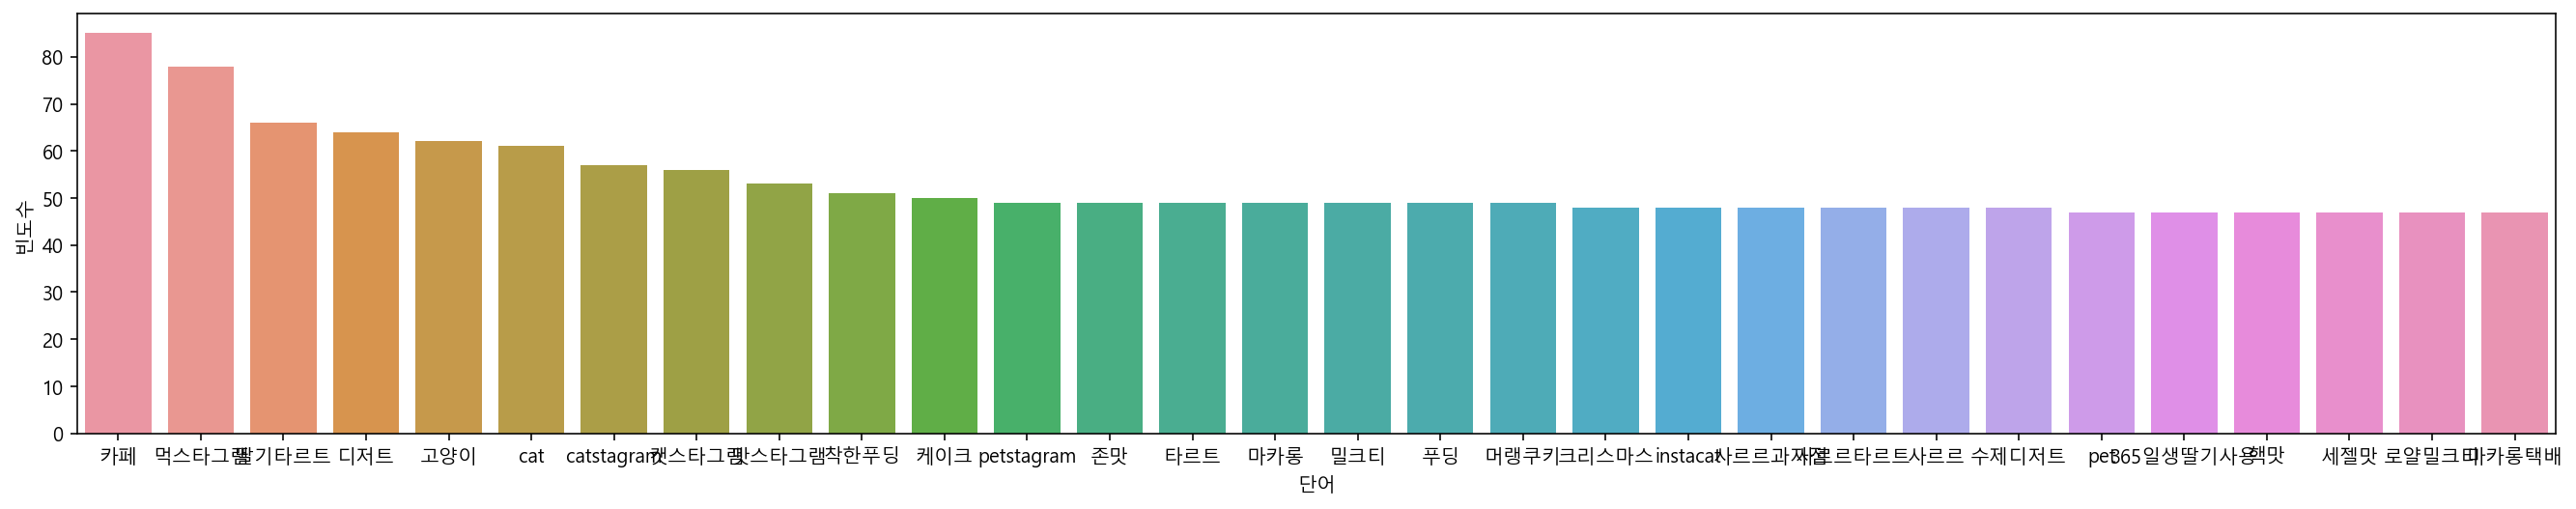

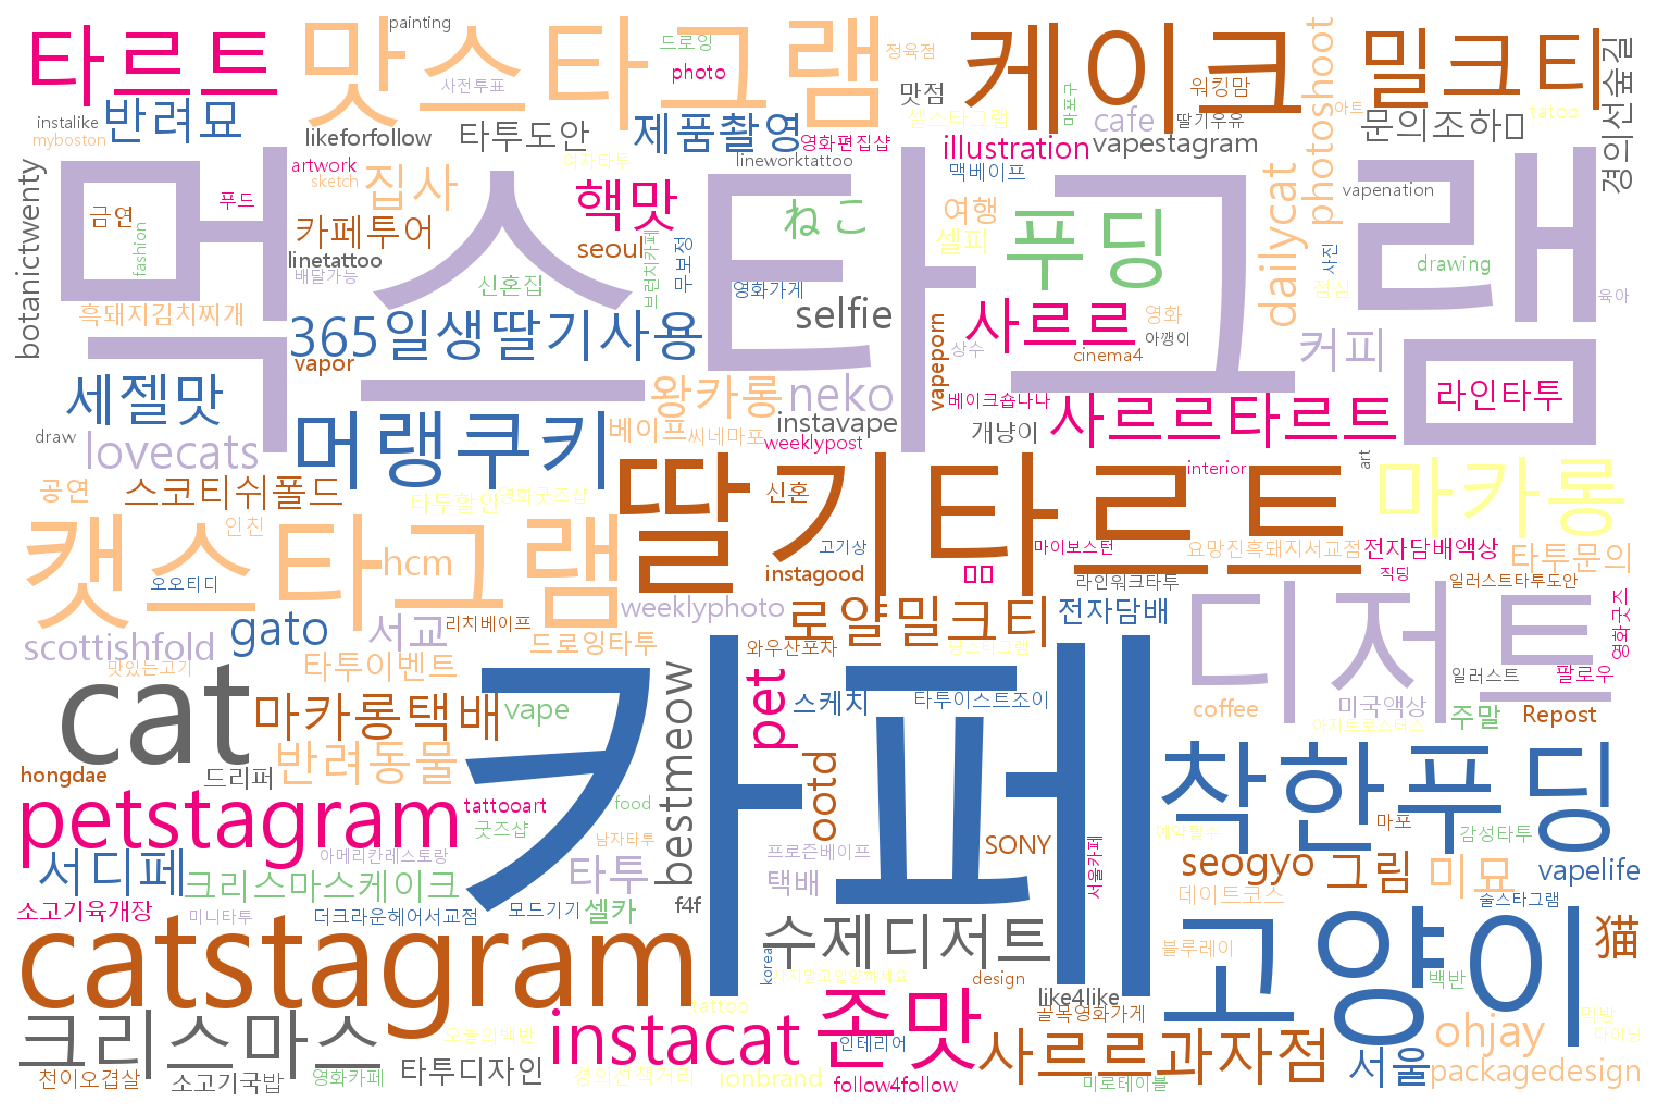

<Figure size 432x288 with 0 Axes>

In [576]:
draw_bar_graph(words,"서교동")
draw_wordcloud(words,"서교동")

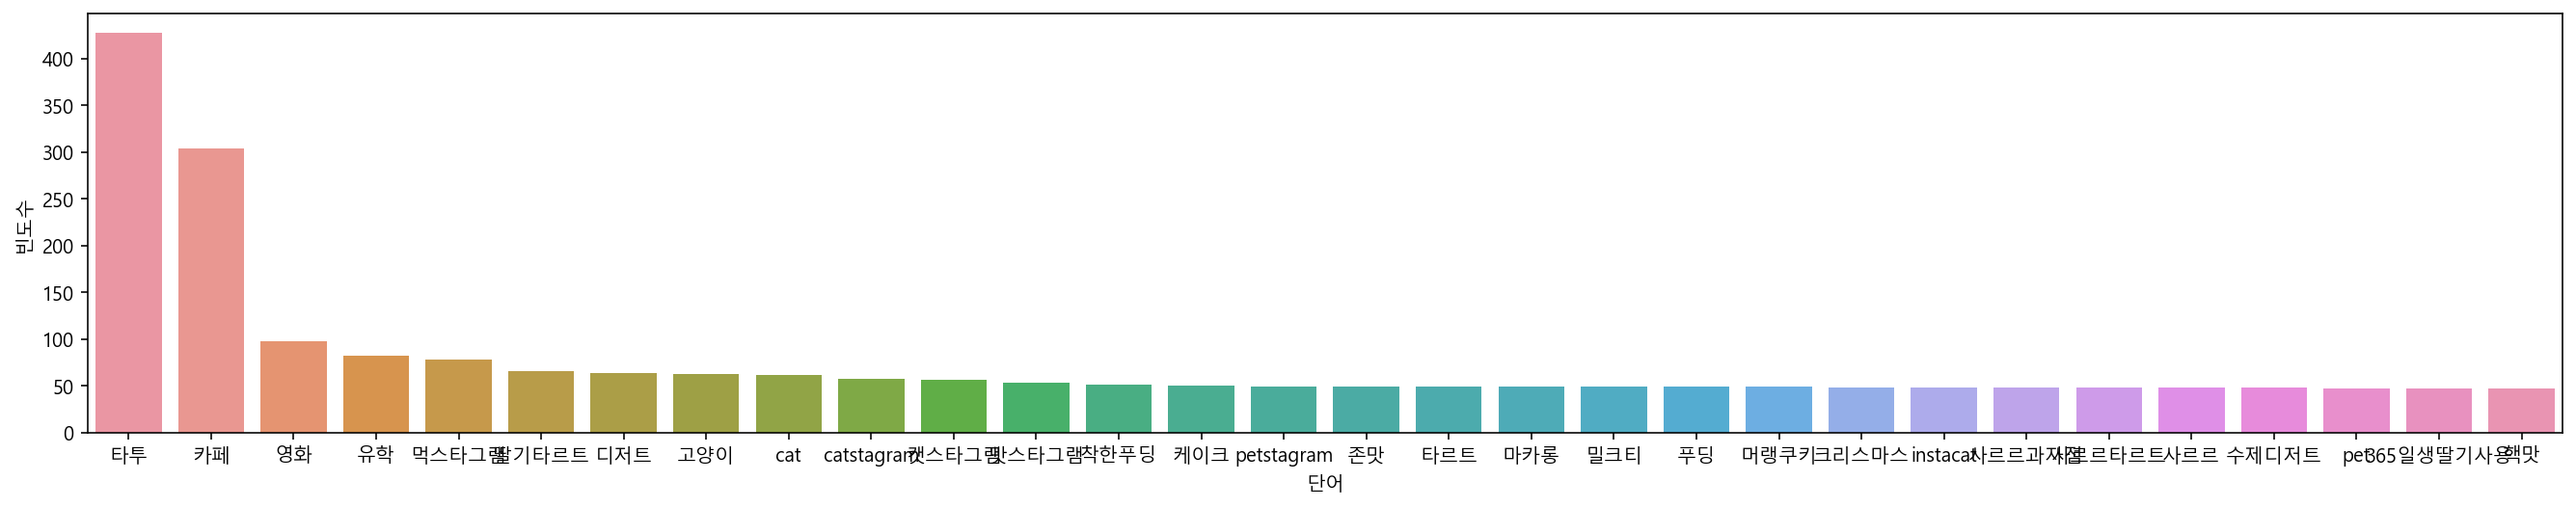

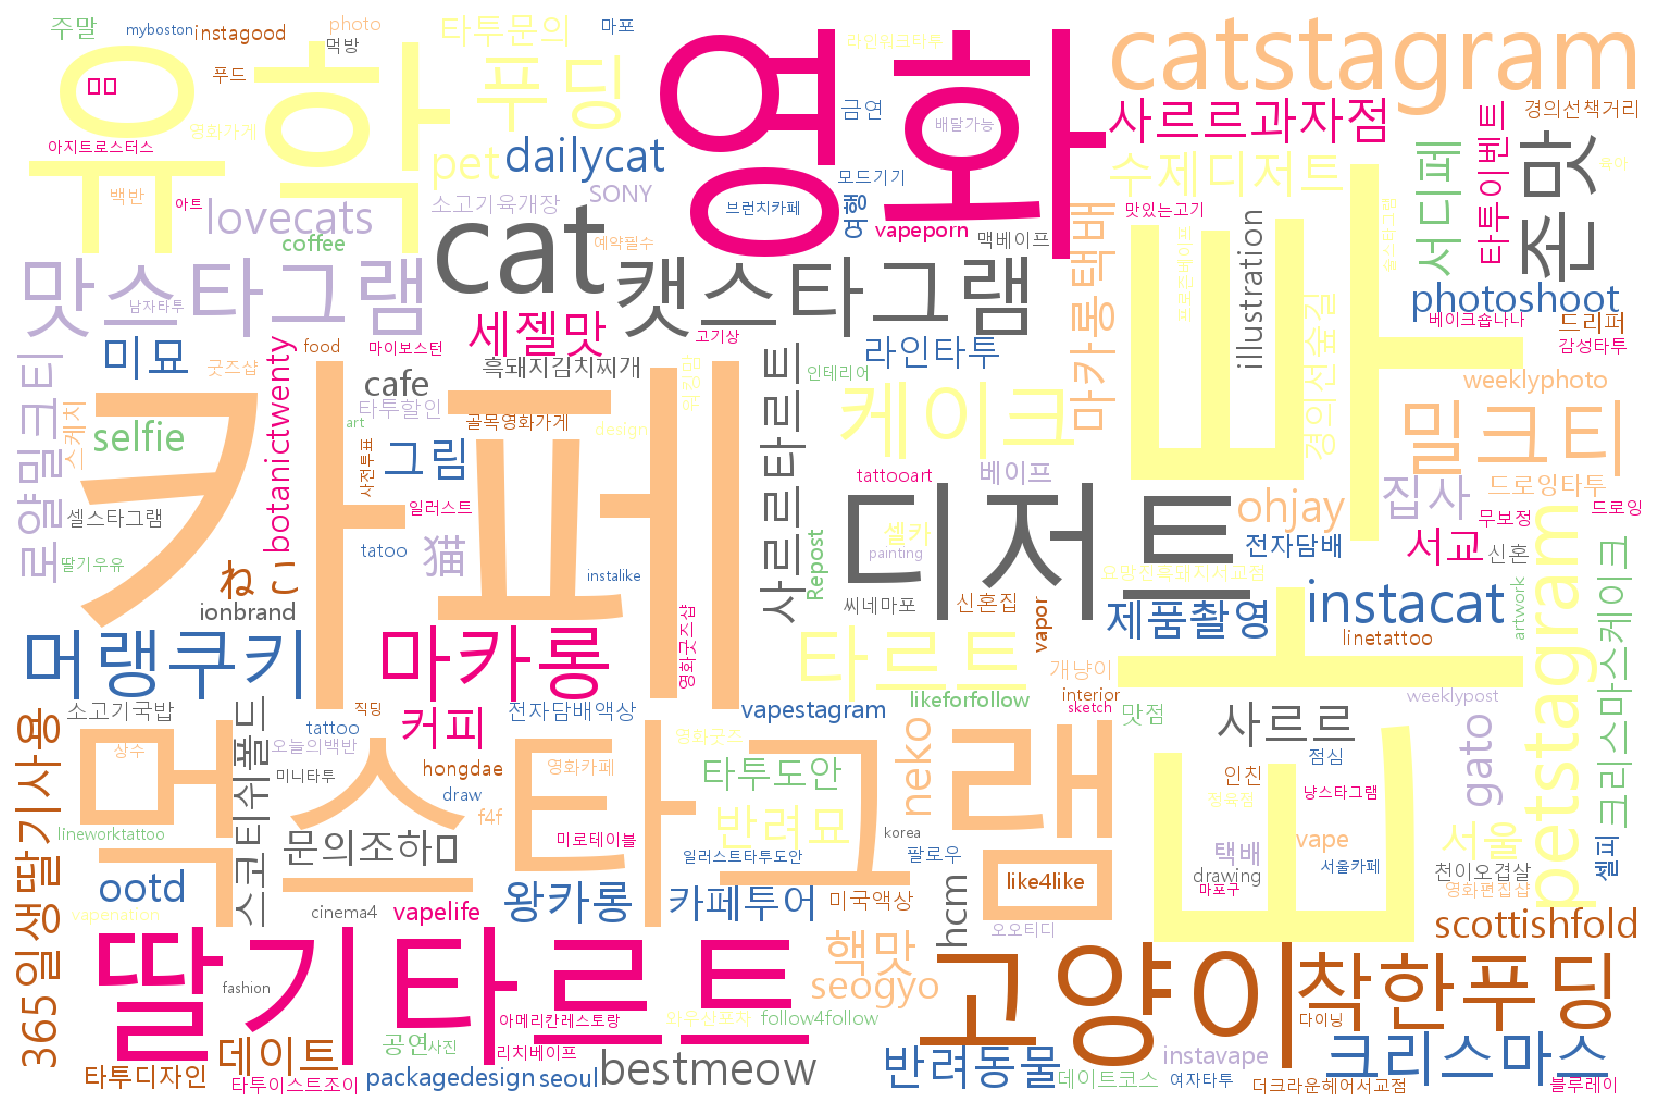

<Figure size 432x288 with 0 Axes>

In [577]:
draw_bar_graph(new_words,"서교동_단어집계")
draw_wordcloud(new_words,"서교동_단어집계")

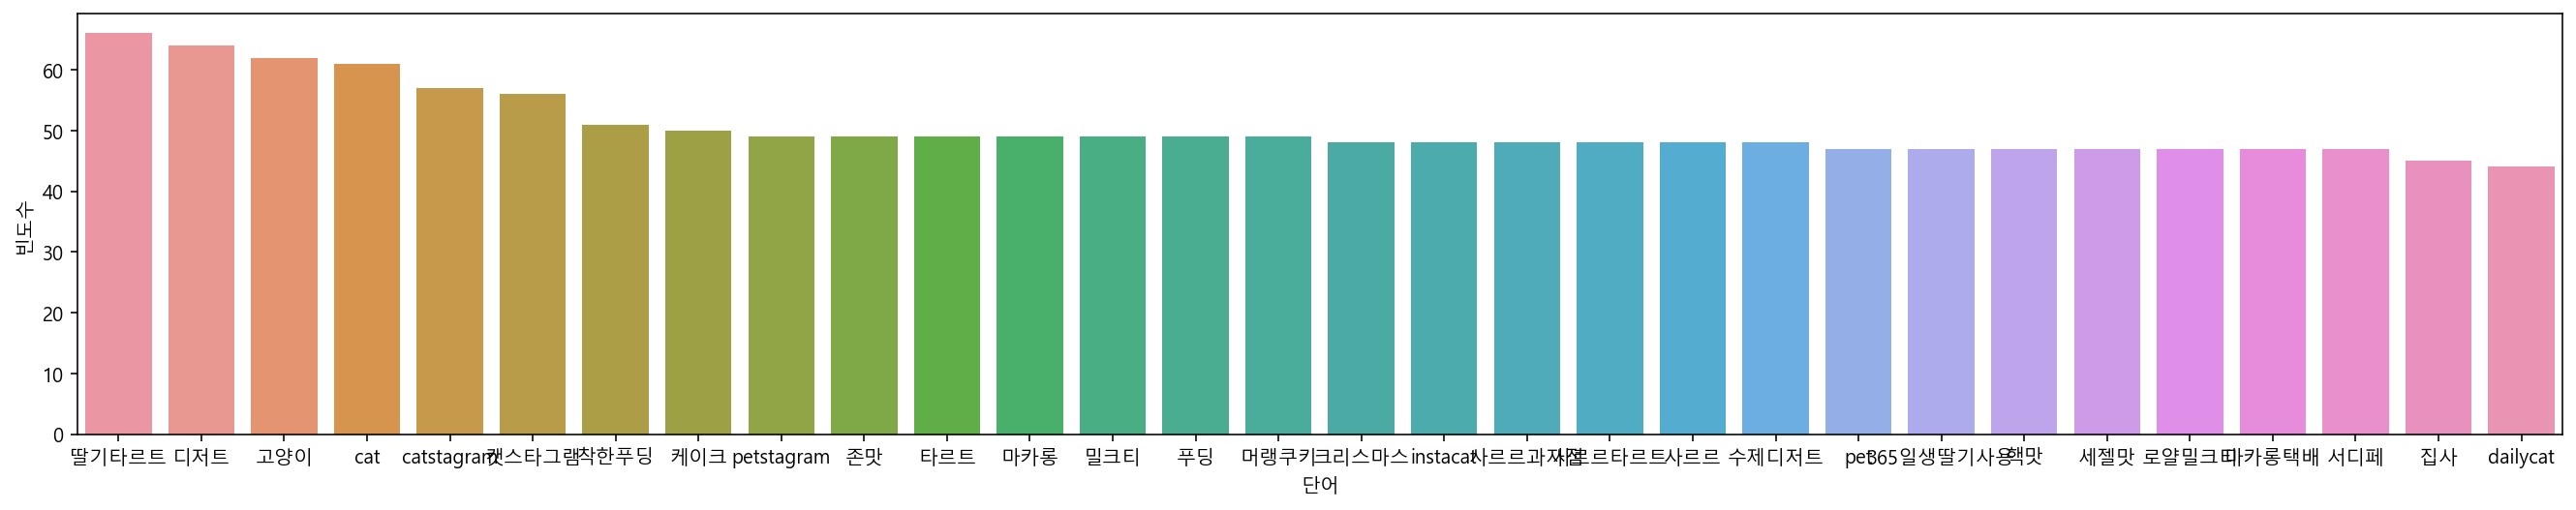

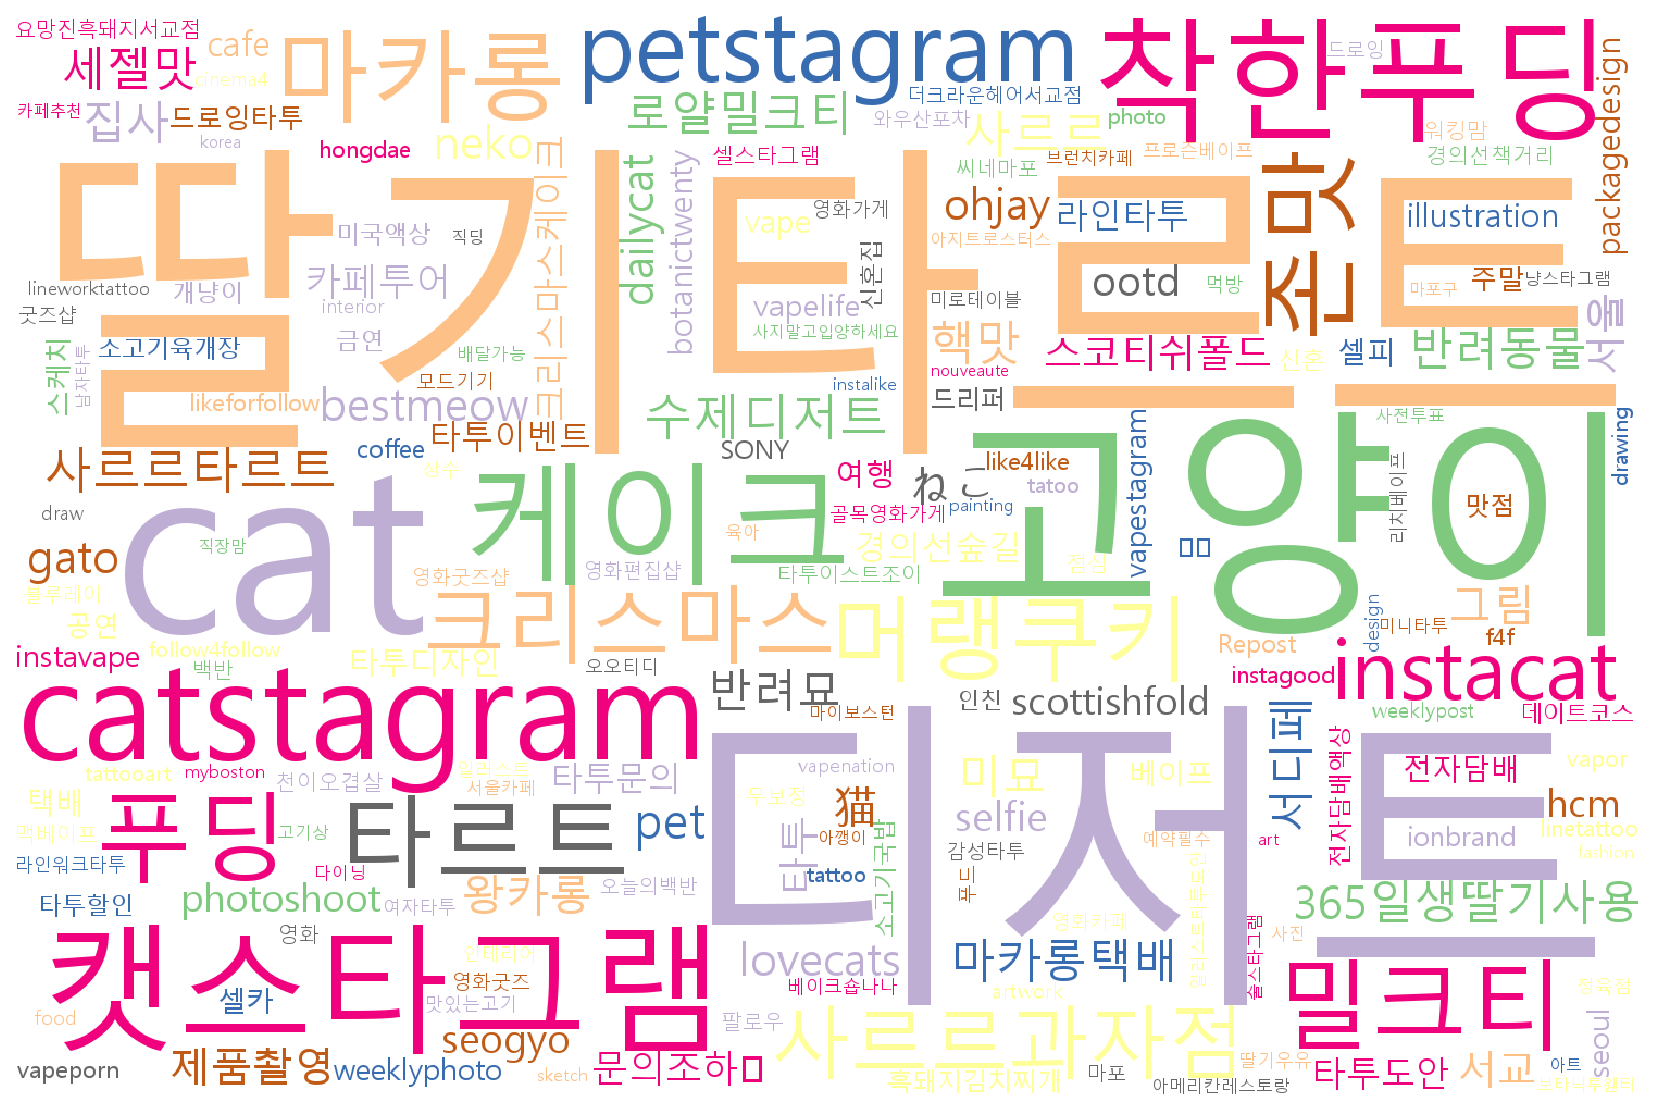

<Figure size 432x288 with 0 Axes>

In [578]:
draw_bar_graph(new_words2,"서교동_일부단어제거")
draw_wordcloud(new_words2,"서교동_일부단어제거")